In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing dataset
df=pd.read_csv('Codeacademy_Discuss.csv')
df.head()

Unnamed: 0                                   Title          Category  \
0           0       The Do’s and Don’ts of Codecademy         Community   
1           1  Day 1 My goal: keep learning every day  30-Day Challenge   
2           2                     “Nothing Built Yet”  30-Day Challenge   
3           3     New feature release: Weekly Targets       Town Square   
4           4       Codecademy Go iOS app not working     Bug Reporting   

   Replies  Views                                           Comments  
0        1  11.4k  The following can be found on our Guidelines P...  
1       31    342  Hi everyone,\nI am new here! I am learning Web...  
2        7    423  I’m currnetly 20% into C#, I haven’t had anyth...  
3        6     86  Hi everyone,\nI’m Richie, a product manager at...  
4        8    105  Hi! The Codecademy Go mobile app for iOS is no...

Text(0, 0.5, 'no of posts')

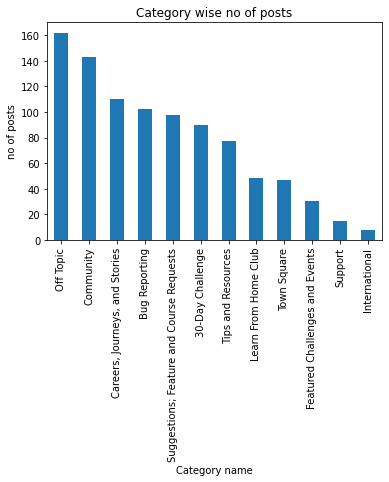

In [2]:
df['Category'].value_counts().plot.bar()
# Add title and axis names
plt.title('Category wise no of posts')
plt.xlabel('Category name')
plt.ylabel('no of posts')

**We can see a Category Imbalance.Some category has large no of posts & some category has less no of posts**

In [3]:
df['Replies'].describe()

count    930.000000
mean       5.897849
std       20.996573
min        0.000000
25%        1.000000
50%        2.000000
75%        6.000000
max      431.000000
Name: Replies, dtype: float64

**some posts have large no of replies.**

In [4]:
df['Views'].describe()

count      930
unique     428
top       1.4k
freq        10
Name: Views, dtype: object

In [5]:
df['word_count'] = df['Comments'].apply(lambda x: len(str(x).split(" "))) ##to calculate word count 
df['char_count'] = df['Comments'].str.len() ## this also includes spaces
#to calculate avg word
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Comments'].apply(lambda x: avg_word(x))
#for stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Comments'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Comments','word_count','char_count','avg_word','stopwords']].head()

Comments  word_count  char_count  \
0  The following can be found on our Guidelines P...        1095        6944   
1  Hi everyone,\nI am new here! I am learning Web...         396        2815   
2  I’m currnetly 20% into C#, I haven’t had anyth...         488        2814   
3  Hi everyone,\nI’m Richie, a product manager at...         278        1668   
4  Hi! The Codecademy Go mobile app for iOS is no...         171         954   

   avg_word  stopwords  
0  4.923801        412  
1  5.515294        123  
2  4.637275        164  
3  4.744828        122  
4  4.514451         65

In [6]:
Compare=df.loc[:,['word_count','stopwords']]
Compare.describe()

word_count    stopwords
count   930.000000   930.000000
mean    404.835484   153.741935
std     563.338027   194.196886
min       2.000000     0.000000
25%     110.000000    40.000000
50%     237.000000    89.000000
75%     494.750000   190.500000
max    7226.000000  1767.000000

**Many Stop words, which means that we  should not remove stop words when doing data cleaning**

In [7]:
#Lowercase the reviews
df['cleaned']=df['Comments'].apply(lambda x: x.lower())
#Remove digits and words containing digits
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
#Remove Punctuations
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

for index,text in enumerate(df['cleaned'][0:]):
    print('\n\nPost %d:\n '%(index+1),text)



Post 1:
  the following can be found on our guidelines page 

how can i be a good citizen of these forums
use the guidelines below and faqs to keep this a clean welllit place for civilized public conversation about learning new skills
the following are aids to your best judgment for navigating our community our team of volunteer moderators super users and community managers are around to help guide your interactions here

how can i improve the discussion
please spend some time browsing the topics here before replying or starting your own and you’ll have a better chance of meeting others who share your interests
be respectful of the topics and the people discussing them even if you disagree with some of what is being said if you are not sure your post adds to the conversation think over what you want to say and come back to it later

the do’s and don’ts
✓ do format your code before posting

do use the search function to find similar questions before posting a new topic
do make sure yo

In [9]:
## 25 Common word removal
freq = pd.Series(' '.join(df['cleaned']).split()).value_counts()[:25]
freq

the     13808
to      12685
i        9556
a        8880
and      8382
you      6854
of       5625
in       4748
it       4729
is       4591
for      4449
that     3952
this     3144
on       3070
with     2734
have     2514
be       2428
if       2403
your     2334
my       2295
but      2174
can      2102
are      2000
as       1992
or       1885
dtype: int64

In [10]:
freq = list(freq.index)
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['cleaned'].head()

0    following found our guidelines page how good c...
1    hi everyone am new here am learning web develo...
2    i’m currnetly into c haven’t had anything do c...
3    hi everyone i’m richie product manager at code...
4    hi codecademy go mobile app ios not working ke...
Name: cleaned, dtype: object

In [11]:
##15 Rare words removal
rare = pd.Series(' '.join(df['cleaned']).split()).value_counts()[-15:]
rare

‘consolelog’        1
stability           1
“overusedwords”     1
capitalizes         1
argentinahowdy      1
engineerfor         1
adjusts             1
develpoment         1
undergraduate       1
boole               1
bjornhansell        1
“flaws”             1
muchthat’s          1
inspiriation        1
notificationshey    1
dtype: int64

In [12]:
rare = list(rare.index)
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
df['cleaned'].head()

0    following found our guidelines page how good c...
1    hi everyone am new here am learning web develo...
2    i’m currnetly into c haven’t had anything do c...
3    hi everyone i’m richie product manager at code...
4    hi codecademy go mobile app ios not working ke...
Name: cleaned, dtype: object

In [13]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [15]:
df_grouped=df[['Category','lemmatized']].groupby(by='Category').agg(lambda x:' '.join(x))
df_grouped

lemmatized
Category                                                                                   
30-Day Challenge                          hi new learn web development want know code fi...
Bug Reporting                             hi codecademy mobile app ios work keep prompt ...
Careers, Journeys, and Stories            hi love share story lose faith year ago sit ro...
Community                                 follow find guideline page good citizen forum ...
Featured Challenges and Events            learn class article david carr develop applica...
International                             quería preguntar si vale la pena pagar por la ...
Learn From Home Club                      moment introduce community question start feel...
Off Topic                                 win week coding relate start new course progre...
Suggestions; Feature and Course Requests  purpose project future web developer capable w...
Support                                   have issue get contact customer support start ...
Tips and Resources                        hello sonny codecademy twitch world big destin...
Town Square                               hi richie product manager codecademy today lau...

In [16]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm

aa  aaa  aaaaand  ab  abandon  abba  \
Category                                                                        
30-Day Challenge                           0    0        0   0        0     0   
Bug Reporting                              0    0        0   0        1     0   
Careers, Journeys, and Stories             0    0        0   0        1     0   
Community                                  1    0        0   1        0     0   
Featured Challenges and Events             0    0        0   0        0     0   
International                              0    0        0   0        0     0   
Learn From Home Club                       0    1        0   0        0     0   
Off Topic                                  0    0        1   0        1     0   
Suggestions; Feature and Course Requests   0    0        0   0        0     0   
Support                                    0    0        0   0        0     0   
Tips and Resources                         0    0        0   0        0     0   
Town Square                                0    0        0   1        0     1   

                                          abbie  abbreviation  \
Category                                                        
30-Day Challenge                              0             0   
Bug Reporting                                 0             0   
Careers, Journeys, and Stories                3             0   
Community                                     0             0   
Featured Challenges and Events                0             2   
International                                 0             0   
Learn From Home Club                          0             0   
Off Topic                                     0             0   
Suggestions; Feature and Course Requests      0             0   
Support                                       0             0   
Tips and Resources                            0             0   
Town Square                                   0             0   

                                          abcdefghhijklmnopqrst  \
Category                                                          
30-Day Challenge                                              0   
Bug Reporting                                                 0   
Careers, Journeys, and Stories                                0   
Community                                                     0   
Featured Challenges and Events                                1   
International                                                 0   
Learn From Home Club                                          0   
Off Topic                                                     0   
Suggestions; Feature and Course Requests                      0   
Support                                                       0   
Tips and Resources                                            0   
Town Square                                                   0   

                                          abcdefghijklmnopqrstuvwxyz  ...  \
Category                                                              ...   
30-Day Challenge                                                   0  ...   
Bug Reporting                                                      0  ...   
Careers, Journeys, and Stories                                     0  ...   
Community                                                          0  ...   
Featured Challenges and Events                                     1  ...   
International                                                      0  ...   
Learn From Home Club                                               0  ...   
Off Topic                                                          0  ...   
Suggestions; Feature and Course Requests                           0  ...   
Support                                                            0  ...   
Tips and Resources                                                 0  ...   
Town Square                                             

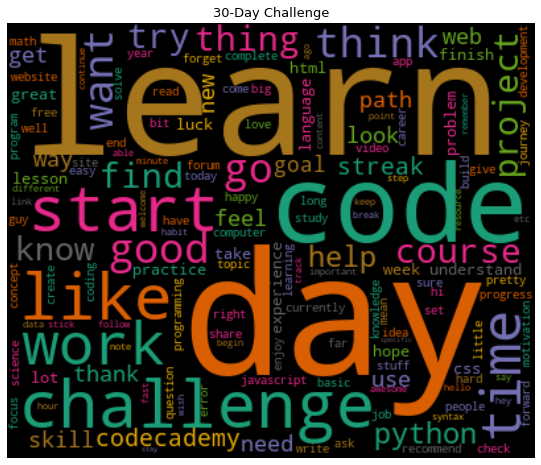

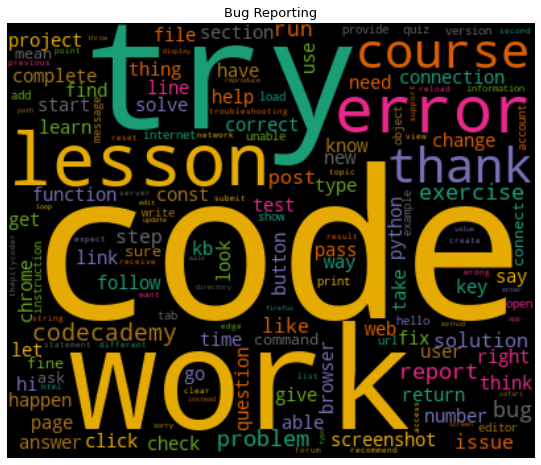

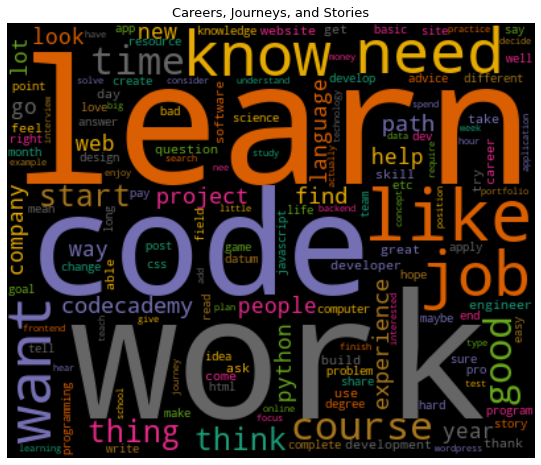

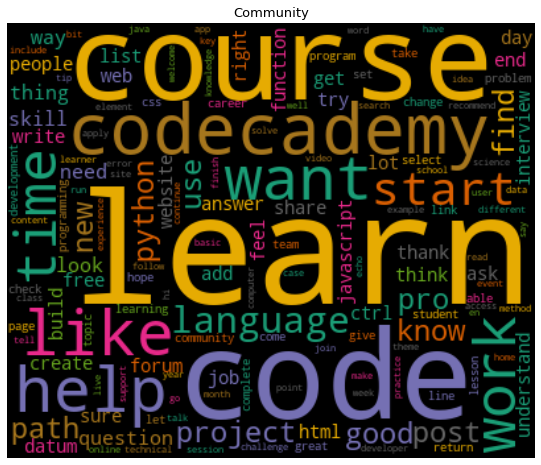

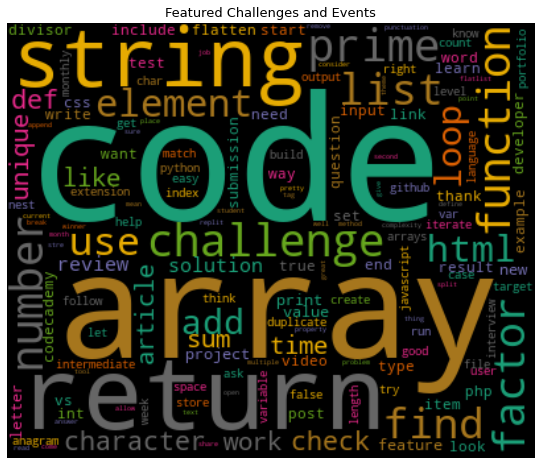

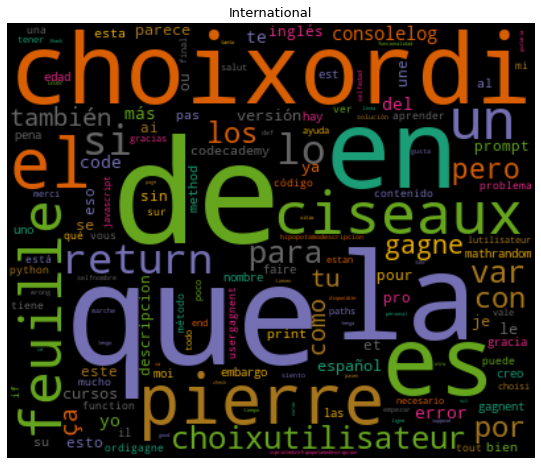

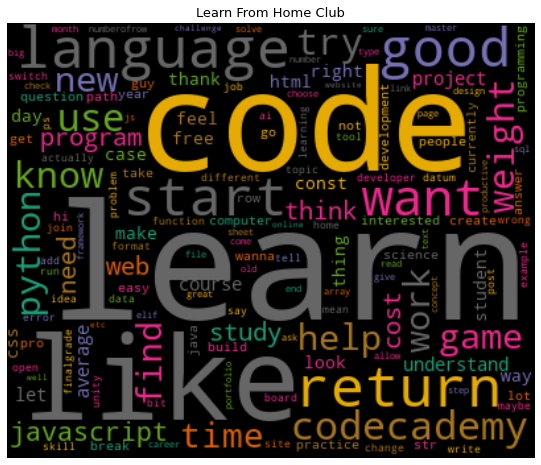

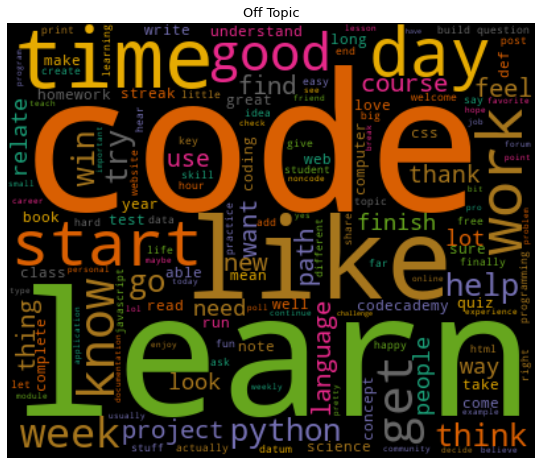

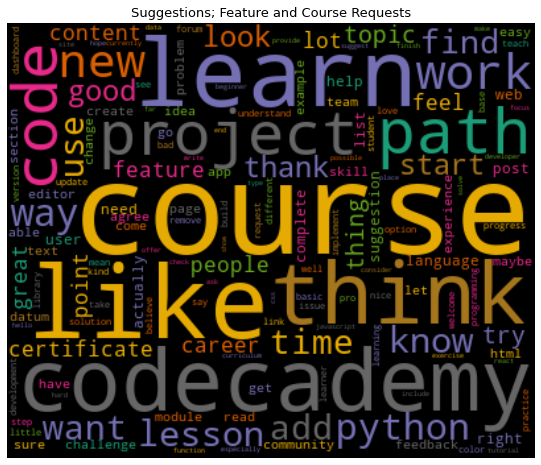

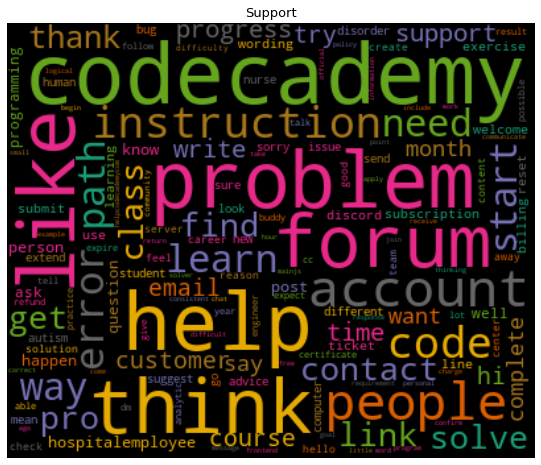

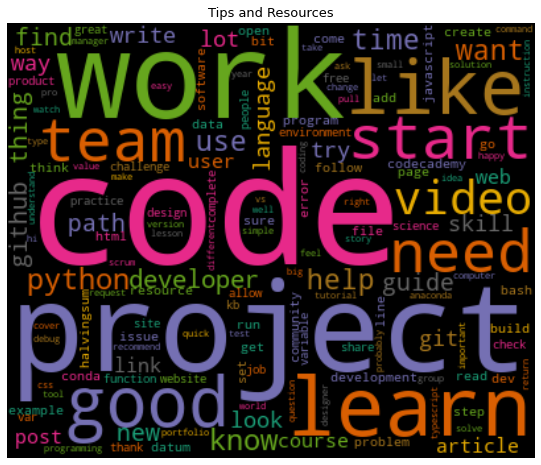

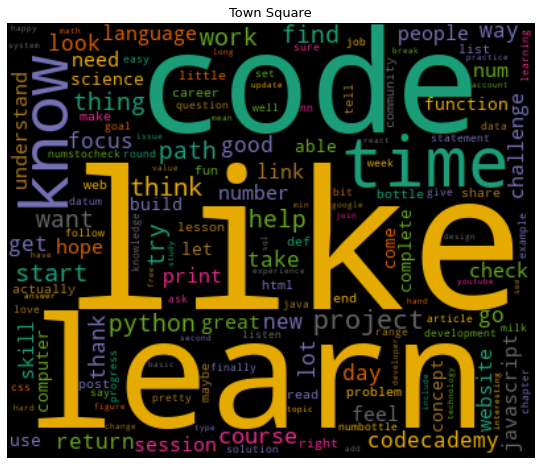

In [18]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
  
#  Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each category
for index,category in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[category].sort_values(ascending=False),category)

In [19]:
# checking only the polarity
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [20]:
print("3 Random comments with Highest Polarity:")
for index,comment in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['Comments']):
    print('Comment {}: '.format(index+1),comment)

3 Random comments with Highest Polarity:
Comment 1:  Chat with other codersHey @adnanyazik5432, if you’re looking to chat, you may find some people here, but probably best to hang out in our Discord server. Check it out:  https://discord.gg/nGqWeYN 5
Comment 2:  According to this road map i should learn package managers first.But i am thinking to go for Learning CSS framework (Bootstrap) because as of now i think i have no requirement of learning npm/yarn moreover i dont have any idea where and how to use them.
Your suggestions are welcome 

Screenshot_2020-04-17-09-49-11-791080×2340 1.06 MB

Comment 3:  Hello coders
I joined Codecademy a month ago frankly i am so happy to learn coding in this platform. I have never ever learned coding before in fact I think in a couple weeks I learnt a lot with Codeacademy. I will keep up.


In [21]:
print("3 Random Reviews with Lowest Polarity:")
for index,comment in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['Comments']):
    print('Comment {}: '.format(index+1),comment)

3 Random Reviews with Lowest Polarity:
Comment 1:  This is the stack overflow link to the whole question :


stackoverflow.com 2






i am unable to draw data from openWeather in my react project 2


javascript, reactjs


  asked by
  
  
    rishit
  
  on 03:47PM - 28 Aug 20 UTC 2







Comment 2:  

studio.code.org 14



Code.org 14
Anyone can learn computer science. Make games, apps and art with code.





this is a demo i did
Comment 3:  Hello people!
I am Talha, an aspiring game dev.
I am going to resume my phaser.js course which I left due to this situation around the world, things are difficult but not impossible. So, here I am on my DAY 1 and would like to upload my work on my YouTube and other social platforms.
Cheers!What’s your Youtube Channel I would like to watch your videos!Thank you for replying. I am still working on my DEV VLOG playlist but you can see it here:
(https://www.youtube.com/channel/UCN9JBmofSWimD4OpbA-IT2Q 1) 


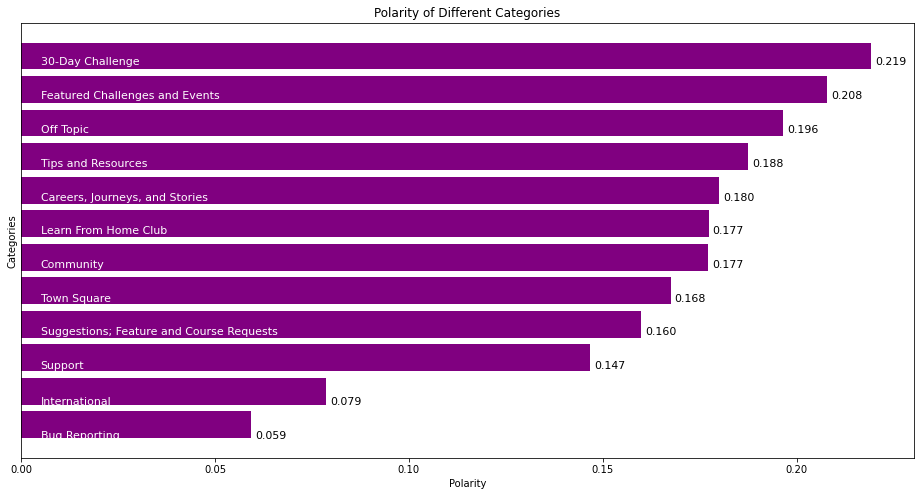

In [24]:
category_polarity_sorted=pd.DataFrame(df.groupby('Category')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Categories')
plt.title('Polarity of Different Categories')
polarity_graph=plt.barh(np.arange(len(category_polarity_sorted.index)),category_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,category in zip(polarity_graph,category_polarity_sorted.index):
    plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(category),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,category_polarity_sorted['polarity']):
    plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()